In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

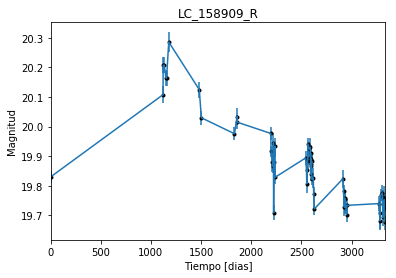

In [4]:
data = np.genfromtxt('LC_158909_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_158909_R')
plt.savefig("LC_158909_R.pdf")

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

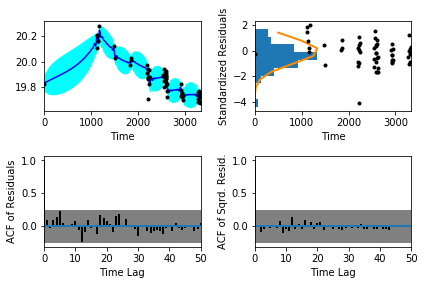

In [7]:
sample.assess_fit()

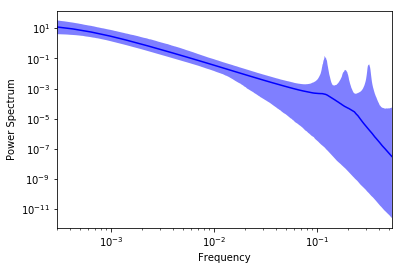

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

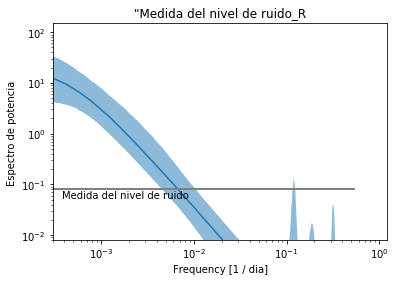

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_158909_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_158909_R')

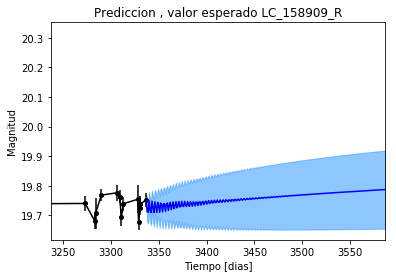

In [13]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_158909_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_158909_R')

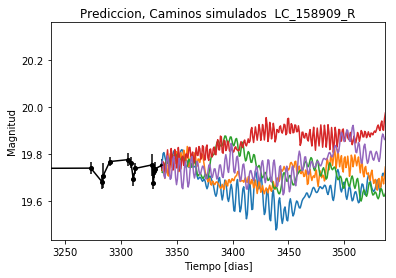

In [14]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_158909_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


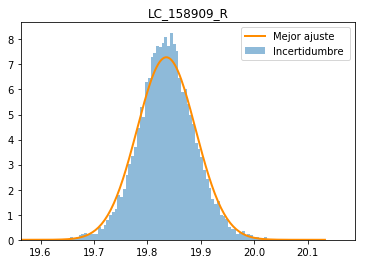

In [15]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_158909_R')
plt.savefig("Mejor_ajuste_LC_158909_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_158909_R')

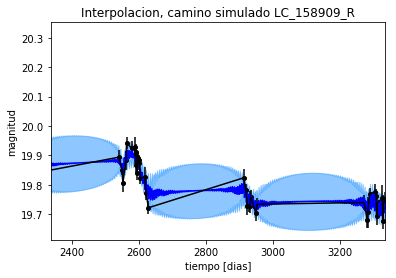

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_R')

Text(0.5,1,'Interpolacion, camino simulado LC_158909_R')

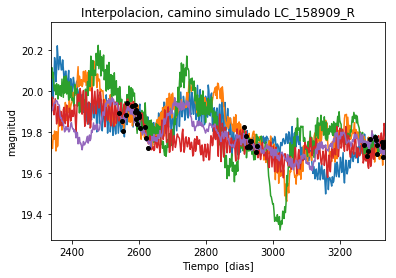

In [17]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_R')

In [18]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 396.682003178
Median: 0.00315664348291
Standard deviation: 0.104035730136
68% credibility interval: [ 0.00083365  0.01121874]
95% credibility interval: [ 0.00035842  0.33042971]
99% credibility interval: [  3.18062194e-04   8.28690260e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 274.10334172
Median: 0.00285618017823
Standard deviation: 0.0433849693599
68% credibility interval: [ 0.000735    0.00887923]
95% credibility interval: [ 0.00034939  0.07362881]
99% credibility interval: [ 0.00031132  0.30801773]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 224.803608539
Median: 0.224823222428
Standard deviation: 0.30073964

In [20]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1744.67911127
Median: 115.575280015
Standard deviation: 3.12088954362
68% credibility interval: [ 111.14160511  117.67733487]
95% credibility interval: [ 107.64486936  118.86412635]
99% credibility interval: [ 105.32677429  119.29939778]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 152.361124521
Median: 1.60680945702
Standard deviation: 2.14286099306
68% credibility interval: [ 0.33294318  4.79986546]
95% credibility interval: [ 0.08384548  6.71082094]
99% credibility interval: [  0.03777379  10.20406923]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 203.547378468
Median: 1.61047820847
Standard deviation: 7.29118078499
68% credibility interval: [ 0.56369866  5.29323401]
95% credibility interval: [  0.26321633  2

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20072.4324428
Median: 6.32119457193e-28
Standard deviation: 9.32720666796e+24
68% credibility interval: [  1.74159771e-83   3.70641248e-13]
95% credibility interval: [  2.17431959e-136   2.79820752e-007]
99% credibility interval: [  9.41843817e-147   2.58512485e+000]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1133.5068373
Median: 19.906598806
Standard deviation: 0.0774927118969
68% credibility interval: [ 19.83164524  19.97839249]
95% credibility interval: [ 19.75040173  20.05869513]
99% credibility interval: [ 19.68413728  20.11895155]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 206.91709709
Median: 0.183784487909
Standard deviation: 0.189259923385
68% credibility interval: [ 0.11621474  0.32858142]
95% credibility interval: [ 0.          0.69528965]
99% credibility interval: [ 0.          0.99891571]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 206.91709709
Median: 0.183784487909
Standard deviation: 0.189259923385
68% credibility interval: [ 0.11621474  0.32858142]
95% credibility interval: [ 0.          0.69528965]
99% credibility interval: [ 0.          0.99891571]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 463.553782309
Median: 0.0
Standard deviation: 0.000278176484188
68% credib

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1744.67911127
Median: 115.575280015
Standard deviation: 3.12088954362
68% credibility interval: [ 111.14160511  117.67733487]
95% credibility interval: [ 107.64486936  118.86412635]
99% credibility interval: [ 105.32677429  119.29939778]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 742.522829818
Median: 0.0267672826542
Standard deviation: 0.0148235133761
68% credibility interval: [ 0.01835001  0.04069994]
95% credibility interval: [ 0.01275594  0.06657794]
99% credibility interval: [ 0.01069671  0.09806423]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 774.416362915
Median: 1.13806407125
Standard deviation: 0.283878421985
68% credibility interval: [ 0.91130526  1.49198311]
95% credibility interval: [ 0.76629847  1.8529597 ]
99% credibility interval: [ 0.68843153  1.96584406]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 828.242525783
Median: 0.0242788339133
Standard deviation: 0.262688353464
68% credibility interval: [ 0.00188044  0.21054806]
95% credibility interval: [  1.73285819e-04   8.84699668e-01]
99% credibility interval: [  2.62810325e-06   1.73730129e+00]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 396.682003178
Median: (-0.0198337759518-1.99874750214j)
Standard deviation: 1.3569753246
68% credibility interval: [-0.07048945-1.99720235j -0.00523797-0.76130084j]
95% credibility interval: [-2.07615112-1.67314993j -0.00225199-0.69514409j]
99% credibility interval: [ -5.20681446e+00+0.j          -1.99844371e-03-0.70396151j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 274.10334172
Median: (-0.0179459093305+1.96320128052j)
Standard deviation: 1.21999938085
68% credibility interval: [-0.05578987+4.68155281j -0.00461816+0.74352517j]
95% credibility interval: [-0.46262345+2.35770668j -0.00219530+0.10040795j]
99% credibility interval: [-1.93533246+2.49998375j -0.00195606+1.19142748j]
Posterior summary for parameter ar_r